<p style="align: center;"><img src="https://static.tildacdn.com/tild6636-3531-4239-b465-376364646465/Deep_Learning_School.png", width=550, height=300></p>

<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

<h2 style="text-align: center;"><b>Transfer Learning</b></h3>

Как Вы уже знаете в современных задачах обработки изображений, будь то задача обнаружения объектов, задача распознавания образов, задача (семантической) сегментации, задача классификации изображений и другие, всё чаще используют **свёрточные нейросети** (*Convolutional Neural Networks*, *CNN*).

Они показывают очень хорошие результаты, за ними стоит как [математический аппарат](https://stats.stackexchange.com/questions/269854/are-there-mathematical-reasons-for-convolution-in-neural-networks-beyond-expedie), так и эвристики, полученные опытным путём.

В данном задании Вам предстоит познакомиться с архитектурами *AlexNet*, *VGG* и *Inception* и для каждой из этих моделей использовать технику **Transfer Learning**.  

* **Transfer Learning** - это процесс дообучения на **новых данных** какой-либо нейросети, уже обученной до этого на других данных, обычно на каком-нибудь хорошем, большом (миллионы картинок) датасете (например, [ImageNet](http://www.image-net.org/) ~ 14 млн картинок).

<h2 style="text-align: center;"><b>AlexNet</b></h2>

**AlexNet** - нейронная сеть, которая победила в ILSVRC (соревнование по классификации картинок из ImageNet) в 2012 году и стала основой для многих других архитектур. Впервые она была представлена в статье  “ImageNet Classification with Deep Convolutional Neural Networks”, над которой работал Джоффри Хинтон - человек, которого многие называют отцом современного computer vision.

Архитектура описана на картинке ниже

<img src="https://www.learnopencv.com/wp-content/uploads/2018/05/AlexNet-1.png">

**AlexNet** состоит из 5 **сверточных** слоев, 3 **MaxPool** слоев и 2 **FullyConnected** слоев в конце. Обратите внимание, что в последнем пулинг слое окна, из которых берется максимум, пересекаются за счет того, что *stride*=2. Это изменение по сравнению с традиционным пулингом помогло снизить ошибку на 0.4%.

По сути **AlexNet** это самая базовая архитектура для сверточной сети после LeNet, которую мы уже писали на предыдущем занятии.

<h2 style="text-align: center;"><b>VGG</b></h3>

Один **сверточный** слой с фильтром 5$\times$5 можно заменить двумя подряд идущими слоями с фильтрами размером 3$\times$3, так как **воспринимаемая область** картинки у них будет одинаковой. При этом уменьшиться количество параметров, поэтому такую сеть будет легче обучать.

На момент создания VGG люди уже заметили, что чем больше слоев в нейросети, тем выше ее точность. Заменяя большие фильтры на несколько фильтров 3$\times$3 исследователи получили глубокую нейросеть с меньшим количеством параметров. Архитектура VGG-16 (версии VGG с 16 слоями) представлена на картинке ниже:


<img src="https://cdn-images-1.medium.com/max/1040/1*0Tk4JclhGOCR_uLe6RKvUQ.png">

Когда говорят **VGG**, то чаще всего имеют ввиду **VGG-16** или **VGG-19**. Более глубоких версий **VGG** нет, так как после 19 слоев точность начинает падать.

Чтобы добиться высоких результатов в соревновании при обучении и валидации нейросети использовались дополнительные премы, подробнее о которых можно прочитать в [статье на Medium](https://medium.com/coinmonks/paper-review-of-vggnet-1st-runner-up-of-ilsvlc-2014-image-classification-d02355543a11).


<h2 style="text-align: center;"><b>Inception v1</b></h3>

### Рассмотрим идею, которая подтолкнула исследователей к созданию этой архитектуры.

Площадь, которую занимает классифицируемый объект, может очень сильно отличаться. Пример на картинке ниже:

<img src="https://cdn-images-1.medium.com/max/1040/1*aBdPBGAeta-_AM4aEyqeTQ.jpeg">

* Для извлечения информации с большой площади лучше всего подходят **большие** фильтры, и наоборот для маленьких объектов лучше **маленькие** фильтры.
* Глубокие нейронные сети намного сложнее обучать: в них появляется проблема **затухания градиента** и они **переобучаются**.
Чтобы решить первую проблему исследователи придумали **Incepton** модуль, который применяет фильтры разного размера и затем склеивает полученные каналы. При этом извлекается как информация из больших объектов, так и из маленьких. Простейшая реализация модуля выглядит так:
<img src="https://cdn-images-1.medium.com/max/1040/1*DKjGRDd_lJeUfVlY50ojOA.png">

Реализацию можно сделать более эффективной, если сначала уменьшить количество каналов с помощью **сверточного слоя** 1$\times$1 и лишь затем применить **слой** с фильтрами 5$\times$5. Сокращение вычислений происходит за счет того, что мы сначала **уменьшаем размерность** данных и лишь затем преобразовываем их. Продвинутая реализация:



<img src="https://cdn-images-1.medium.com/max/1040/1*U_McJnp7Fnif-lw9iIC5Bw.png">

Сеть состоит из **корня** (нескольких сверточных слоев) и **Inception** модулей идущих за ним. Оранжевым прямоугольников выделен корень, а фиолетовыми - **вспомогательные классификаторы**. Именно они помогают бороться со второй проблемой, которую мы упомянули ранее. Наша функция потерь - взвешенная сумма **LogLoss** на двух **вспомогательных классификаторах** и **основном** в конце нейронной сети.
<img src="https://cdn-images-1.medium.com/max/1040/1*uW81y16b-ptBDV8SIT1beQ.png">

После Inception v1 были представлены 2, 3 и 4 версии, пррочитать о которых вы можете  в [статье на Medium](https://towardsdatascience.com/a-simple-guide-to-the-versions-of-the-inception-network-7fc52b863202).

Однако сейчас научились иначе бороться с затуханием градиентов с помощью **residual conncection**. Это позволило увеличить число слоев в нейронной сети.

![](https://i.imgur.com/XwcnU5x.png)

<h2 style="text-align: center;"><b>Transfer Learning</b></h3>

Теперь мы перейдем к тому, как можно использовать уже обученные нейросети, чтобы ускорить свою работу.

Давайте вспомним общую архитектуру CNN:

<img src="https://drive.google.com/uc?id=14pApKqQjnmWMXazY0HHjREn9rI9uwCQg">

С помощью операций *свёртки (convolution)* и *пулинга (pooling)* всё, что расположено до этапа *classification*, по сути **извлекает признаки из объектов, подающихся на вход** (картинок, в данном случае). То есть вместо того, чтобы самим пытаться как-то описать картинки для хорошей работы классификатора, мы предоставляем заняться этим нейросети (обучая её методом обратного распространения ошибки ([лекция 4](https://www.youtube.com/watch?v=HZDOhHAg5_g))).

**Вопрос (творческий):**  А какие признаки для картинок приходят Вам в голову? (считать, что картинки цветные (3 канала), все одинакового размера)

**Ответ:** <Ваши мысли>

Представим теперь, что eсть свой набор данных, и Вы хотите научить сеть классифицировать объекты из Вашей выборки.  


Надеемся, что теперь Вам стало понятнее, как обучать крутые сети на новых данных.

<h2 style="text-align: center;"><b>Переходим к практике</b></h3>

<p style="text-align: center;"><i>(основано на http://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html)</i></p>

Мы будем пользоваться библиотекой PyTorch. Если Вы её ещё не установили, то вот [инструкция на Wiki по установке PyTorch](https://github.com/deepmipt/dlschl/wiki/%D0%98%D0%BD%D1%81%D1%82%D1%80%D1%83%D0%BA%D1%86%D0%B8%D1%8F-%D0%BF%D0%BE-%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5-PyTorch).

In [ ]:
!pip install -q torchvision catalyst

     |████████████████████████████████| 491kB 22.3MB/s 
     |████████████████████████████████| 317kB 58.6MB/s 
     |████████████████████████████████| 163kB 60.2MB/s 
     |████████████████████████████████| 71kB 11.7MB/s 


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import time
import os

### В чём состоит задание

Вам предстоит попробовать использовать  типа архитектур свёрточных нейросетей - **AlexNet (сделано за Вас в примере), VGG16, Inception_v3** - как *Feature Extractor*, с помощью *Fine Tuning* и *"из коробки"*.

**Для каждого пункта нужно:**
- вывести график loss'а на обучающей и на валидационной выборке
- вывести качество модели (accuracy)

### Данные  

В данном задании используются сети (из библиотеки **torchvision**), предобученные на датасете ImageNet.  
В качестве новых данных будет датасет Меравьи vs Пчёлы, Вам нужно скачать его отсюда: **[Муравьи vs Пчёлы](https://download.pytorch.org/tutorial/hymenoptera_data.zip)**, *являющийся частью датасета ImageNet*. В нём 400 картинок, ~250 обучение и ~150 валидация (тест).

### Функции для отрисовки и обучения модели:

* Загрузим данные:

In [3]:
!wget https://download.pytorch.org/tutorial/hymenoptera_data.zip
!unzip hymenoptera_data.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [7]:
# Преобразование обучающих данных для расширения обучающей выборки и её нормализация
# Для валидационной (тестовой) выборки только нормализация
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(244),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(244),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
# папка с данными. Если запускаете в колабе, нужно скопировать данные к себе в директорию и примонтировать диск. Если запускаете локально -- просто скачайте данные
data_dir = './hymenoptera_data'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}
# специальный класс для загрузки данных в виде батчей

train_dataloader = torch.utils.data.DataLoader(
    image_datasets["train"], batch_size=32,
    shuffle=True
)
val_dataloader = torch.utils.data.DataLoader(
    image_datasets["val"], batch_size=128
)

loaders = {
    "train": train_dataloader,
    "valid": val_dataloader
}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

use_gpu = torch.cuda.is_available()


False

Размеры обучающей и валидационной выборок:

In [8]:
print(dataset_sizes)

{'train': 244, 'val': 153}


**Вопрос (на понимание кода выше):**  
1. В DataLoader() выше стоит "shuffle=True". Для чего это нужно?
2. Сколько картинок будет в каждом батче?

**Ответ:** <Ваш ответ>

* Посмотрим на картинки из датасета:

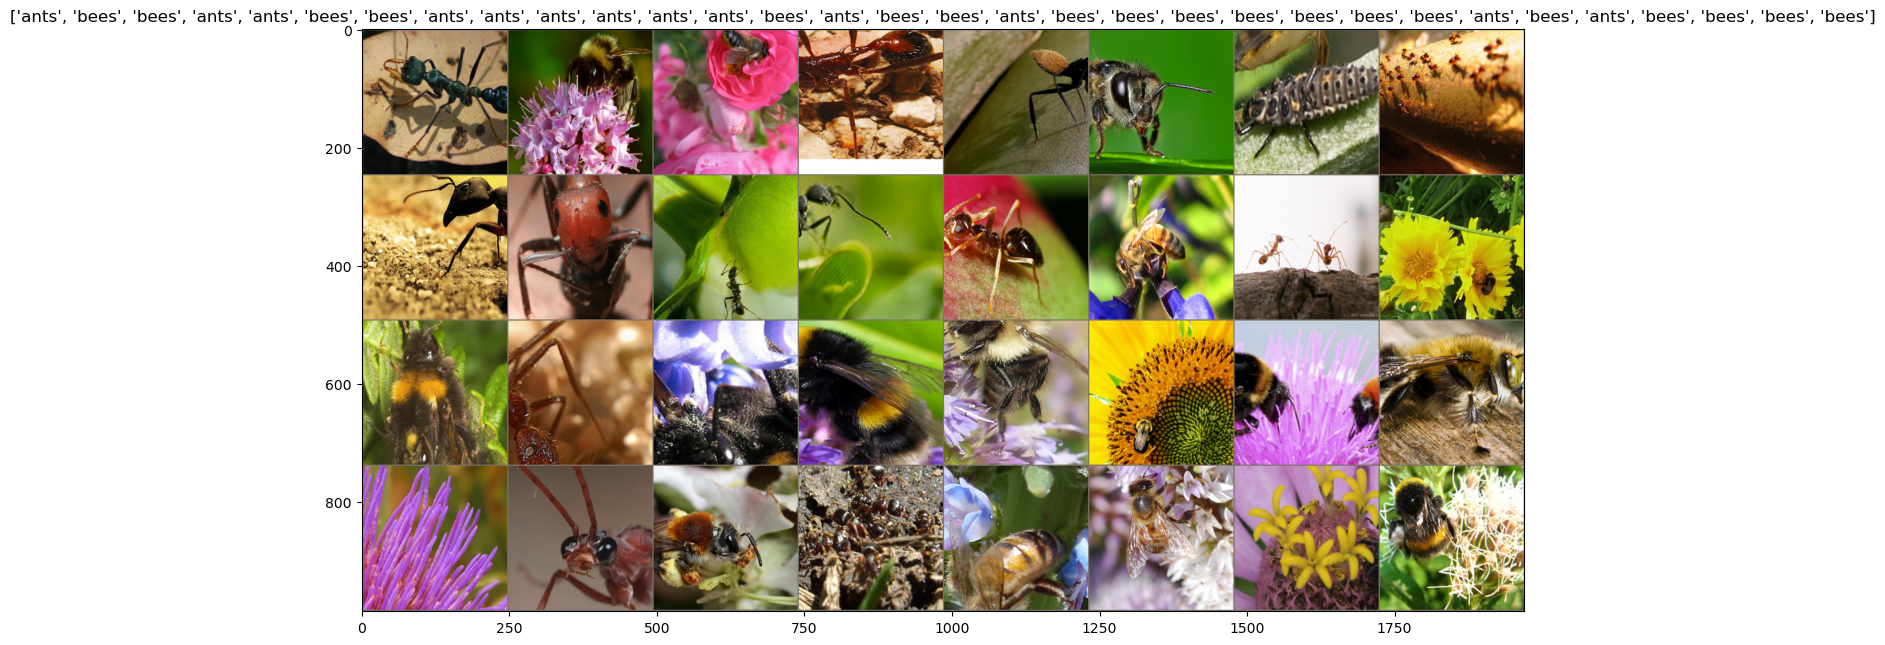

In [9]:
from matplotlib import pyplot as plt

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(15, 12))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)


# Получим 1 батч (картнки-метки) из обучающей выборки
inputs, classes = next(iter(loaders['train']))

# Расположим картинки рядом
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [10]:
image_datasets["train"][0]

(tensor([[[-0.5938, -0.5938, -0.6109,  ...,  0.6221,  0.8618,  1.1700],
          [-0.5938, -0.5938, -0.6109,  ...,  0.8447,  0.9132,  1.0844],
          [-0.6109, -0.6109, -0.6281,  ...,  1.1015,  1.0159,  1.0159],
          ...,
          [-0.6794, -0.6794, -0.6965,  ..., -0.6109, -0.6109, -0.6281],
          [-0.6623, -0.6794, -0.6794,  ..., -0.6109, -0.6109, -0.6281],
          [-0.7137, -0.7137, -0.7137,  ..., -0.6109, -0.5938, -0.5767]],
 
         [[ 0.8004,  0.8004,  0.8179,  ..., -0.1450,  0.0301,  0.3102],
          [ 0.8004,  0.8004,  0.8179,  ...,  0.1176,  0.1001,  0.2402],
          [ 0.7829,  0.7829,  0.8004,  ...,  0.4153,  0.2577,  0.1877],
          ...,
          [ 0.7129,  0.7129,  0.6954,  ...,  0.7829,  0.7829,  0.7654],
          [ 0.7304,  0.7129,  0.7129,  ...,  0.7829,  0.7829,  0.7654],
          [ 0.6779,  0.6779,  0.6779,  ...,  0.7829,  0.8004,  0.8179]],
 
         [[ 2.3611,  2.3611,  2.3611,  ..., -0.6715, -0.7238, -0.7413],
          [ 2.3611,  2.3611,

### Обучение моделей

Следующая функция будет использоваться для обучения модели. Аргументы:  
* model $-$ нейросеть
* loss $-$ оптимизируемая функция (criterion, cost function, objective)
* optimizer $-$ оптимизационный алгоритм
* scheduler $-$ политика изменения learning_rate
* num_epochs $-$ количество итераций обучения

In [244]:
from catalyst import dl, metrics
from torch.nn import functional as F

class CustomerRunner(dl.Runner):

    def predict_batch(self, batch):
        # model inference step
        return self.model(batch[0].to(self.device).view(batch[0].size(0), -1))

    def handle_batch(self, batch):
        # model train/valid step
        x, y = batch
        self.input = {"targets": y}
        y_hat = self.model(x)
        self.output = {"logits": y_hat}
        #loss = self.criterion(y_hat, y)
        #print('y hat', y_hat[:,1])
        #print(y)
        #loss = F.cross_entropy(y_hat, y)
        #accuracy01, accuracy03 = metrics.accuracy(y_hat, y, topk=(1, 3))
        #self.batch_metrics.update(
        #    {"loss": loss, "accuracy01": accuracy01, "accuracy03": accuracy03}
        #)
        #for key in ["loss", "accuracy01", "accuracy03"]:
        #    self.meters[key].update(
        #        self.batch_metrics[key].item(), self.batch_size
        #    )
        #if self.is_train_loader:
        #    self.engine.backward(loss)
        #    self.optimizer.step()
        #    self.optimizer.zero_grad()
#
        ## Update metrics (includes the metric that tracks the loss)
        ##self.batch_metrics.update({"loss": loss, "mae": F.l1_loss(y_hat[:,1], y)})
#
    #
        #
        

In [245]:
runner = CustomerRunner()
runner.train(
    model=model,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks={
            "accuracy": dl.AccuracyCallback(input_key="logits", target_key="targets"),
        "criterion": dl.CriterionCallback(input_key="logits", target_key="targets", metric_key="loss", criterion_key=None),
            "optim": dl.OptimizerCallback(metric_key="loss"),
    },
    loaders=loaders,
    num_epochs=10,
    verbose=True,
    valid_metric= "accuracy01",
    minimize_valid_metric=True,
    logdir="logs/alexnet"
)

1/10 * Epoch (train):   0%|          | 0/8 [00:00<?, ?it/s]

RuntimeError: selected index k out of range

### Задание

Для каждой из следующих нейросетей:
* **AlexNet** (уже сделано в примере)
* **VGG16**
* **Inception_v3**

Напишите код и выведите результат (график лосса, accuracy и вывод примера классификации картинок с визализацией (с помощью функции `vizualize_model()`)) для трёх способов:
* Использование готовой нейросети **"из коробки"**
* Использование нейросети как **Feature Extractor**
* **Fine Tuning** нейросети

Для каждого пункта нужно:
* сделать с сетью то, что нужно в пункте ("из коробки", FE или FT)
* вывести график loss'а на обучающей и на валидационной выборке
* вывести качество модели (accuracy) на валидационной (тестовой) выборке
* (по желанию) использовать функцию visualize_model()

### AlexNet

*ПРИМЕЧАНИЕ: Здесь не выведены графики loss'а и не использована visualize_model(). От Вас это ожидается.*

Загрузка модели:

In [199]:
model = models.alexnet(pretrained=True)

c:\Users\Katie\miniconda3\envs\mltest\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Katie\miniconda3\envs\mltest\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Посмотрим, что внутри:

In [200]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Видим, что на вход классификатору (classifier) подаётся *9216 признаков*. Это и будет размер входа для нашего нового классификатора.

* **Fine Tuning** способ

Сконфигурируем - изменим FC-слой и зададим *cost function* и *оптимизирующий алгоритм*:

(*по умолчанию backpropagation распространяется на все слои, поэтому здесь мы только заменяем FC-слой на свой классификатор*)

In [139]:
!rm -rf logs

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [201]:
# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 4096
# Заменяем Fully-Connected слой на наш линейный классификатор
model.classifier[6] = nn.Linear(num_features, 2)
if use_gpu:
    model = model.cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [141]:
%reload_ext tensorboard
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 20276), started 3:28:38 ago. (Use '!kill 20276' to kill it.)

In [137]:
runner = CustomerRunner()
runner.train(
    model=model,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks={
        "optimizer":
        dl.OptimizerCallback(metric_key="loss"),
       
      # dl.AccuracyCallback(input_key="logits", target_key="targets")
    },
    loaders=loaders,
    num_epochs=10,
    verbose=True,
    #valid_metric="accuracy01",
    #minimize_metric=False,
    logdir="logs/alexnet"
)

1/10 * Epoch (train):   0%|          | 0/8 [00:00<?, ?it/s]

train (1/10) lr: 0.0001 | momentum: 0.9


1/10 * Epoch (valid):   0%|          | 0/2 [00:00<?, ?it/s]

valid (1/10) lr: 0.0001 | momentum: 0.9
* Epoch (1/10) 


2/10 * Epoch (train):   0%|          | 0/8 [00:00<?, ?it/s]

train (2/10) lr: 0.0001 | momentum: 0.9


2/10 * Epoch (valid):   0%|          | 0/2 [00:00<?, ?it/s]

valid (2/10) lr: 0.0001 | momentum: 0.9
* Epoch (2/10) 


3/10 * Epoch (train):   0%|          | 0/8 [00:00<?, ?it/s]

train (3/10) lr: 0.0001 | momentum: 0.9


3/10 * Epoch (valid):   0%|          | 0/2 [00:00<?, ?it/s]

valid (3/10) lr: 0.0001 | momentum: 0.9
* Epoch (3/10) 


4/10 * Epoch (train):   0%|          | 0/8 [00:00<?, ?it/s]

train (4/10) lr: 0.0001 | momentum: 0.9


4/10 * Epoch (valid):   0%|          | 0/2 [00:00<?, ?it/s]

valid (4/10) lr: 0.0001 | momentum: 0.9
* Epoch (4/10) 


5/10 * Epoch (train):   0%|          | 0/8 [00:00<?, ?it/s]

train (5/10) lr: 0.0001 | momentum: 0.9


5/10 * Epoch (valid):   0%|          | 0/2 [00:00<?, ?it/s]

valid (5/10) lr: 0.0001 | momentum: 0.9
* Epoch (5/10) 


6/10 * Epoch (train):   0%|          | 0/8 [00:00<?, ?it/s]

train (6/10) lr: 0.0001 | momentum: 0.9


6/10 * Epoch (valid):   0%|          | 0/2 [00:00<?, ?it/s]

valid (6/10) lr: 0.0001 | momentum: 0.9
* Epoch (6/10) 


7/10 * Epoch (train):   0%|          | 0/8 [00:00<?, ?it/s]

train (7/10) lr: 0.0001 | momentum: 0.9


7/10 * Epoch (valid):   0%|          | 0/2 [00:00<?, ?it/s]

valid (7/10) lr: 0.0001 | momentum: 0.9
* Epoch (7/10) 


8/10 * Epoch (train):   0%|          | 0/8 [00:00<?, ?it/s]

train (8/10) lr: 0.0001 | momentum: 0.9


8/10 * Epoch (valid):   0%|          | 0/2 [00:00<?, ?it/s]

valid (8/10) lr: 0.0001 | momentum: 0.9
* Epoch (8/10) 


9/10 * Epoch (train):   0%|          | 0/8 [00:00<?, ?it/s]

train (9/10) lr: 0.0001 | momentum: 0.9


9/10 * Epoch (valid):   0%|          | 0/2 [00:00<?, ?it/s]

valid (9/10) lr: 0.0001 | momentum: 0.9
* Epoch (9/10) 


10/10 * Epoch (train):   0%|          | 0/8 [00:00<?, ?it/s]

train (10/10) lr: 0.0001 | momentum: 0.9


10/10 * Epoch (valid):   0%|          | 0/2 [00:00<?, ?it/s]

valid (10/10) lr: 0.0001 | momentum: 0.9
* Epoch (10/10) 
Top models:
logs/alexnet\checkpoints/model.0010.pth	10.0000


* **Feature Extractor** способ:

In [36]:
model_extractor = models.alexnet(pretrained=True)

c:\Users\Katie\miniconda3\envs\mltest\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Katie\miniconda3\envs\mltest\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Помним, что по-умолчанию все слои нейросети обучаются заново:

In [37]:
for param in model_extractor.parameters():
    print(param.requires_grad)
    break

True


Сделаем так, чтобы на них *не распространялся backpropagation* (заморозим их), и подменим классификатор (ведь старый уже с весами для ImageNet'а).

In [38]:
# замораживаем параметры (веса)
for param in model_extractor.parameters():
    param.requires_grad = False

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 4096
# Заменяем Fully-Connected слой на наш линейный классификатор
model_extractor.classifier[6] = nn.Linear(num_features, 2)

# Обучаем только классификатор
optimizer = optim.Adam(model_extractor.classifier[6].parameters(), lr=1e-4)

In [39]:
runner = ImgRunner()

runner.train(
    model=model_extractor,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(),
        dl.OptimizerCallback(),
        dl.AccuracyCallback()
    ],
    loaders=loaders,
    num_epochs=10,
    verbose=True,
    main_metric="accuracy01",
    minimize_metric=False,
    logdir="logs/alexnet_freeze"
)

TypeError: Can't instantiate abstract class ImgRunner without an implementation for abstract method 'handle_batch'

* **Смешанный** способ:
Мы будем обучать не только последний **fully connected** слой, но и несколько предпоследних

In [ ]:
model_mixed = models.alexnet(pretrained=True)

In [ ]:
model_mixed

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
from itertools import chain

layers_to_unfreeze = 5

# Выключаем подсчет градиентов для слоев, которые не будем обучать
for param in model_mixed.features[:-layers_to_unfreeze].parameters():
    param.requires_grad = False

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 4096
# Заменяем Fully-Connected слой на наш линейный классификатор
model_mixed.classifier[6] = nn.Linear(num_features, 2)

# Обучаем последние layers_to_unfreeze слоев из сверточной части и fully connected слой
# parameters() возвращает просто список тензоров парамтеров, поэтому два таких списка можно сложить
optimizer = torch.optim.Adam(
    chain(
        list(model_mixed.features.parameters())[-layers_to_unfreeze:],
        model_mixed.classifier.parameters()
    ),
    lr=1e-4,
)

In [ ]:
runner = ImgRunner()

runner.train(
    model=model_mixed,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(),
        dl.OptimizerCallback(),
        dl.AccuracyCallback()
    ],
    loaders=loaders,
    num_epochs=10,
    verbose=True,
    main_metric="accuracy01",
    minimize_metric=False,
    logdir="logs/alexnet_mixed"
)

1/10 * Epoch (train): 100% 8/8 [00:02<00:00,  3.80it/s, accuracy01=0.900, loss=0.315]
1/10 * Epoch (valid): 100% 2/2 [00:01<00:00,  1.39it/s, accuracy01=0.840, loss=0.496]
[2020-11-15 10:18:44,828] 
1/10 * Epoch 1 (_base): lr=0.0001 | momentum=0.9000
1/10 * Epoch 1 (train): accuracy01=0.7459 | loss=0.5176
1/10 * Epoch 1 (valid): accuracy01=0.8758 | loss=0.3102
2/10 * Epoch (train): 100% 8/8 [00:02<00:00,  3.69it/s, accuracy01=0.900, loss=0.171]
2/10 * Epoch (valid): 100% 2/2 [00:01<00:00,  1.43it/s, accuracy01=0.880, loss=0.346]
[2020-11-15 10:19:48,384] 
2/10 * Epoch 2 (_base): lr=0.0001 | momentum=0.9000
2/10 * Epoch 2 (train): accuracy01=0.9057 | loss=0.2514
2/10 * Epoch 2 (valid): accuracy01=0.8954 | loss=0.3397
3/10 * Epoch (train): 100% 8/8 [00:02<00:00,  3.81it/s, accuracy01=0.850, loss=0.204]
3/10 * Epoch (valid): 100% 2/2 [00:01<00:00,  1.45it/s, accuracy01=0.880, loss=0.280]
[2020-11-15 10:20:57,785] 
3/10 * Epoch 3 (_base): lr=0.0001 | momentum=0.9000
3/10 * Epoch 3 (train):

**Вопрос 1 (важный):** С чем связано повышение качества если мы перестаем учить всю сеть? (Подсказка: посмотрите на датасет и на то, как он согласуется с 4-мя ситуациями, описанными выше)

**Ответ (важный):** <Ваш ответ>

**Вопрос 2**: Почему разморозка последних слоев не дает прироста к точности, хотя разморозить несколько послдних слоев обычно хорошеее решение для классификации похожего датасета? (Вопрос на внимательность)

**Ответ:** <Ваш ответ>

### Бонус

Существует еще один интересный способ. Мы не хотим, чтобы ядра в свертках сильно менялись во время обучения, а еще мы знаем, что чем меньше lr, тем меньше изменения. Давайте уменьшим lr на feature extractor-е! Разберемся как это сделать...

In [ ]:
model_mixed_lr = models.alexnet(pretrained=True)

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 4096
# Заменяем Fully-Connected слой на наш линейный классификатор
model_mixed.classifier[6] = nn.Linear(num_features, 2)


In [ ]:
optimizer = torch.optim.Adam(
    (
        {
            "params": model_mixed_lr.features.parameters(),
            "lr": 1e-6,
        },
        {
            "params": model_mixed_lr.classifier.parameters(),
        }
     ),
     lr=1e-4
)

In [ ]:
runner = ImgRunner()

runner.train(
    model=model_mixed_lr,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(),
        dl.OptimizerCallback(),
        dl.AccuracyCallback()
    ],
    loaders=loaders,
    num_epochs=10,
    verbose=True,
    main_metric="accuracy01",
    minimize_metric=False,
    logdir="logs/alexnet_mixed_lr"
)

1/10 * Epoch (train): 100% 8/8 [00:02<00:00,  3.58it/s, accuracy01=0.450, loss=2.791]
1/10 * Epoch (valid): 100% 2/2 [00:01<00:00,  1.38it/s, accuracy01=0.840, loss=0.655]
[2020-11-15 10:27:51,282] 
1/10 * Epoch 1 (_base): lr=1.000e-06 | momentum=0.9000
1/10 * Epoch 1 (train): accuracy01=0.1680 | loss=7.5550
1/10 * Epoch 1 (valid): accuracy01=0.6601 | loss=1.5137
2/10 * Epoch (train): 100% 8/8 [00:02<00:00,  3.46it/s, accuracy01=0.900, loss=0.456]
2/10 * Epoch (valid): 100% 2/2 [00:01<00:00,  1.43it/s, accuracy01=0.720, loss=1.557]
[2020-11-15 10:28:59,994] 
2/10 * Epoch 2 (_base): lr=1.000e-06 | momentum=0.9000
2/10 * Epoch 2 (train): accuracy01=0.8033 | loss=0.7463
2/10 * Epoch 2 (valid): accuracy01=0.8366 | loss=0.6349
3/10 * Epoch (train): 100% 8/8 [00:02<00:00,  3.41it/s, accuracy01=0.850, loss=0.287]
3/10 * Epoch (valid): 100% 2/2 [00:01<00:00,  1.33it/s, accuracy01=0.880, loss=0.574]
[2020-11-15 10:30:11,650] 
3/10 * Epoch 3 (_base): lr=1.000e-06 | momentum=0.9000
3/10 * Epoch 3

### Другие, более современные нейросети

**Вопрос:** Какую стратегию Вы выберете, учитывая размер и специфику нового датасета?

**Ответ:** <Ваш ответ>

### ResNet 18

In [ ]:
models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
# Ваш код здесь
model_extractor = models.resnet18(pretrained=True)

# замораживаем параметры (веса)
for param in model_extractor.parameters():
    param.requires_grad = False

# num_features -- это размерность вектора фич, поступающего на вход FC-слою
num_features = 512
# Заменяем Fully-Connected слой на наш линейный классификатор
model_extractor.fc = nn.Linear(num_features, 2)

# Обучаем только классификатор
optimizer = optim.Adam(model_extractor.fc.parameters(), lr=1e-3)

In [ ]:
runner = ImgRunner()

runner.train(
    model=model_extractor,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(),
        dl.OptimizerCallback(),
        dl.AccuracyCallback()
    ],
    loaders=loaders,
    num_epochs=10,
    verbose=True,
    main_metric="accuracy01",
    minimize_metric=False,
    logdir="logs/resnet",
    load_best_on_end=True,
)

1/10 * Epoch (train): 100% 8/8 [00:02<00:00,  3.35it/s, accuracy01=0.650, loss=0.608]
1/10 * Epoch (valid): 100% 2/2 [00:01<00:00,  1.21it/s, accuracy01=0.960, loss=0.427]
[2020-11-15 10:37:34,476] 
1/10 * Epoch 1 (_base): lr=0.0010 | momentum=0.9000
1/10 * Epoch 1 (train): accuracy01=0.5984 | loss=0.6645
1/10 * Epoch 1 (valid): accuracy01=0.7843 | loss=0.5094
2/10 * Epoch (train): 100% 8/8 [00:02<00:00,  3.58it/s, accuracy01=1.000, loss=0.401]
2/10 * Epoch (valid): 100% 2/2 [00:01<00:00,  1.21it/s, accuracy01=0.680, loss=0.583]
[2020-11-15 10:37:38,990] 
2/10 * Epoch 2 (_base): lr=0.0010 | momentum=0.9000
2/10 * Epoch 2 (train): accuracy01=0.8033 | loss=0.5088
2/10 * Epoch 2 (valid): accuracy01=0.8693 | loss=0.4132
3/10 * Epoch (train): 100% 8/8 [00:02<00:00,  3.55it/s, accuracy01=0.850, loss=0.372]
3/10 * Epoch (valid): 100% 2/2 [00:01<00:00,  1.17it/s, accuracy01=0.880, loss=0.343]
[2020-11-15 10:37:45,039] 
3/10 * Epoch 3 (_base): lr=0.0010 | momentum=0.9000
3/10 * Epoch 3 (train):

In [ ]:
# замораживаем параметры (веса)
for param in model_extractor.parameters():
    param.requires_grad = True

optimizer = optim.Adam(model_extractor.parameters(), lr=1e-4)

runner = ImgRunner()

runner.train(
    model=model_extractor,
    optimizer=optimizer,
    criterion=nn.CrossEntropyLoss(),
    callbacks=[
        dl.CriterionCallback(),
        dl.OptimizerCallback(),
        dl.AccuracyCallback()
    ],
    loaders=loaders,
    num_epochs=10,
    verbose=True,
    main_metric="accuracy01",
    minimize_metric=False,
    logdir="logs/resnet_step2",
    load_best_on_end=True,
)

1/10 * Epoch (train): 100% 8/8 [00:02<00:00,  2.81it/s, accuracy01=0.900, loss=0.254]
1/10 * Epoch (valid): 100% 2/2 [00:01<00:00,  1.24it/s, accuracy01=0.880, loss=0.349]
[2020-11-15 10:38:33,420] 
1/10 * Epoch 1 (_base): lr=0.0001 | momentum=0.9000
1/10 * Epoch 1 (train): accuracy01=0.9098 | loss=0.2236
1/10 * Epoch 1 (valid): accuracy01=0.9412 | loss=0.2039
2/10 * Epoch (train): 100% 8/8 [00:02<00:00,  2.73it/s, accuracy01=1.000, loss=0.058]
2/10 * Epoch (valid): 100% 2/2 [00:01<00:00,  1.17it/s, accuracy01=0.880, loss=0.316]
[2020-11-15 10:38:43,453] 
2/10 * Epoch 2 (_base): lr=0.0001 | momentum=0.9000
2/10 * Epoch 2 (train): accuracy01=0.9590 | loss=0.1015
2/10 * Epoch 2 (valid): accuracy01=0.9346 | loss=0.2288
3/10 * Epoch (train): 100% 8/8 [00:02<00:00,  2.74it/s, accuracy01=0.950, loss=0.134]
3/10 * Epoch (valid): 100% 2/2 [00:01<00:00,  1.23it/s, accuracy01=0.880, loss=0.577]
[2020-11-15 10:38:53,160] 
3/10 * Epoch 3 (_base): lr=0.0001 | momentum=0.9000
3/10 * Epoch 3 (train):


<h2 style="text-align: center;"><b>Полезные ссылки</b></h3>

1). *cs231n: http://cs231n.github.io/transfer-learning/*

2). *Туториал на PyTorch Tutorials: https://pytorch.org/tutorials/beginner/transfer_learning_tutorial*

3). *Статья на Medium про TL в PyTorch: https://medium.com/@14prakash/almost-any-image-classification-problem-using-pytorch-i-am-in-love-with-pytorch-26c7aa979ec4*  